In [9]:
!pip install git+http://hf.co/usm3d/tools.git

  Cloning http://hf.co/usm3d/tools.git to /tmp/pip-req-build-f68pznqf
  Running command git clone --filter=blob:none --quiet http://hf.co/usm3d/tools.git /tmp/pip-req-build-f68pznqf
  Resolved http://hf.co/usm3d/tools.git to commit 0614af07256edd3fc13b8b606b58ee2c3f0804d0
  Preparing metadata (setup.py) ... done


In [10]:
import webdataset as wds
import numpy as np
from huggingface_hub import hf_hub_download
from hoho import proc
from tqdm import tqdm
import sys
sys.path.append('..')
from vishesh_solution import *

# Loading part of training data

For simplicity we are showing example only on a once shard of data

In [8]:
from huggingface_hub import notebook_login

notebook_login()


In [11]:
# One shard of the dataset
dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename='data/train/hoho_v3_000-of-032.tar.gz',
            repo_type="dataset"))

dataset = dataset.decode()
dataset = dataset.map(proc)

for entry in dataset:
    human_entry = convert_entry_to_human_readable(entry)
    print (entry.keys())
    break


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


hoho_v3_000-of-032.tar.gz:   0%|          | 0.00/1.01G [00:00<?, ?B/s]

dict_keys(['__key__', '__imagekey__', '__url__', 'ade20k', 'depthcm', 'gestalt', 'wf_vertices', 'wf_edges', 'edge_semantics', 'mesh_vertices', 'mesh_faces', 'face_semantics', 'K', 'R', 't', 'images', 'points3d', 'cameras'])


In [12]:
# Download all the datasets:
for i in range(32):
    dataset = wds.WebDataset(hf_hub_download(repo_id='usm3d/hoho-train-set',
            filename=f'data/train/hoho_v3_{str(i).zfill(3)}-of-032.tar.gz',
            repo_type="dataset"))

hoho_v3_001-of-032.tar.gz:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

hoho_v3_002-of-032.tar.gz:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

hoho_v3_003-of-032.tar.gz:   0%|          | 0.00/935M [00:00<?, ?B/s]

hoho_v3_004-of-032.tar.gz:   0%|          | 0.00/1.06G [00:00<?, ?B/s]

hoho_v3_005-of-032.tar.gz:   0%|          | 0.00/964M [00:00<?, ?B/s]

hoho_v3_006-of-032.tar.gz:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

hoho_v3_007-of-032.tar.gz:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

hoho_v3_008-of-032.tar.gz:   0%|          | 0.00/915M [00:00<?, ?B/s]

hoho_v3_009-of-032.tar.gz:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

hoho_v3_010-of-032.tar.gz:   0%|          | 0.00/968M [00:00<?, ?B/s]

hoho_v3_011-of-032.tar.gz:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

hoho_v3_012-of-032.tar.gz:   0%|          | 0.00/927M [00:00<?, ?B/s]

hoho_v3_013-of-032.tar.gz:   0%|          | 0.00/950M [00:00<?, ?B/s]

hoho_v3_014-of-032.tar.gz:   0%|          | 0.00/993M [00:00<?, ?B/s]

hoho_v3_015-of-032.tar.gz:   0%|          | 0.00/993M [00:00<?, ?B/s]

hoho_v3_016-of-032.tar.gz:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

hoho_v3_017-of-032.tar.gz:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

hoho_v3_018-of-032.tar.gz:   0%|          | 0.00/911M [00:00<?, ?B/s]

hoho_v3_019-of-032.tar.gz:   0%|          | 0.00/1.13G [00:00<?, ?B/s]

hoho_v3_020-of-032.tar.gz:   0%|          | 0.00/964M [00:00<?, ?B/s]

hoho_v3_021-of-032.tar.gz:   0%|          | 0.00/924M [00:00<?, ?B/s]

hoho_v3_022-of-032.tar.gz:   0%|          | 0.00/915M [00:00<?, ?B/s]

Error while downloading from https://cdn-lfs-us-1.huggingface.co/repos/c4/2c/c42c945fe87800afa15d351c0cec913a605022e63cf4951c2938d8a6a944ee50/2fc3e5656a587ef58e36e594341d96e0aa01ee84596de8c7b29259ef8963bf17?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27hoho_v3_022-of-032.tar.gz%3B+filename%3D%22hoho_v3_022-of-032.tar.gz%22%3B&response-content-type=application%2Fgzip&Expires=1716839841&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNjgzOTg0MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2M0LzJjL2M0MmM5NDVmZTg3ODAwYWZhMTVkMzUxYzBjZWM5MTNhNjA1MDIyZTYzY2Y0OTUxYzI5MzhkOGE2YTk0NGVlNTAvMmZjM2U1NjU2YTU4N2VmNThlMzZlNTk0MzQxZDk2ZTBhYTAxZWU4NDU5NmRlOGM3YjI5MjU5ZWY4OTYzYmYxNz9yZXNwb25zZS1jb250ZW50LWRpc3Bvc2l0aW9uPSomcmVzcG9uc2UtY29udGVudC10eXBlPSoifV19&Signature=UNFQwKja5lh9E1n9x56D7Ygvrxn%7E%7EwGOQXYJTvhHlg%7EDzdR5IE81SJrNhtS6mv-W-tK88lNQUsWonS3HA5LWKMTUDhmP9jK9umbsPIAC3WdNUVzR730QAWxABDje8W6orG0CwDkUoVGq

hoho_v3_022-of-032.tar.gz:   9%|9         | 83.9M/915M [00:00<?, ?B/s]

hoho_v3_023-of-032.tar.gz:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

hoho_v3_024-of-032.tar.gz:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

EntryNotFoundError: 404 Client Error. (Request ID: Root=1-6650f1f1-0da907fe25b4cf1e24b628d1;4f1139b9-d8c5-4472-b9e9-00c209883f2c)

Entry Not Found for url: https://huggingface.co/datasets/usm3d/hoho-train-set/resolve/main/data/train/hoho_v3_025-of-032.tar.gz.

In [22]:
human_entry['points3d'][178]

Point3D(id=178, xyz=array([-112.43335521, -556.28305805,  228.37245189]), rgb=array([49, 57, 57]), error=array(2.09771263), image_ids=array([6, 7]), point2D_idxs=array([2156,  348]))

# Visualizing inputs

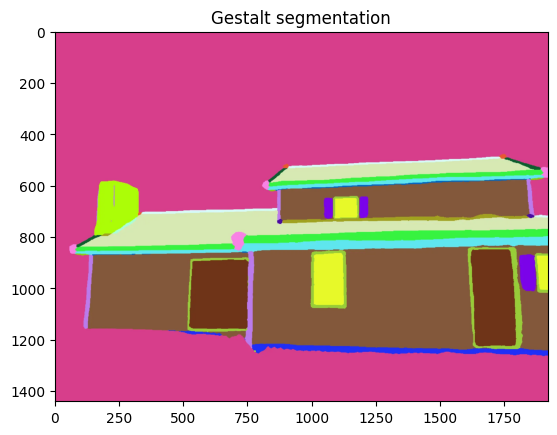

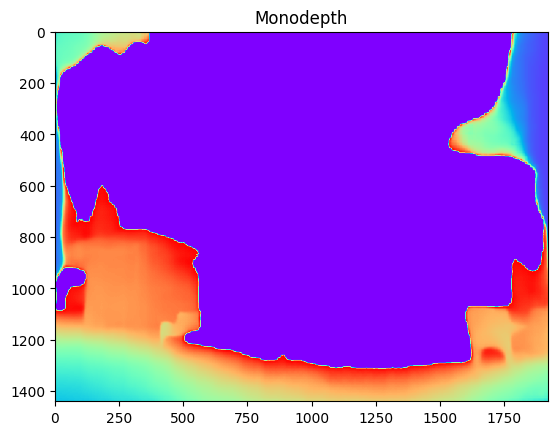

In [24]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(human_entry['gestalt'][2])
plt.title('Gestalt segmentation')

plt.figure()
depth = np.array(human_entry['depthcm'][2])/100.
depth[depth>20] = 0
depth = depth/depth.max()
plt.title('Monodepth')
plt.imshow(depth, cmap='rainbow')


In [25]:
# Here is the prediction and visualization of single entry
key, vertices, edges = predict(entry, visualize=True)

Not enough vertices or connections in image 2


In [17]:
from hoho import compute_WED

compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            ce=1)

2.534572293655895

In [21]:
compute_WED(vertices,
            edges,
            np.array(entry['wf_vertices']),
            np.array(entry['wf_edges']),
            ce=1)

2.534572293655895